# THE SPARKS FOUNDATION

# TASK 3: Exploratory Data Analysis - Retail


1.   Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
2.   As a business manager, try to find out the weak areas where you can work to make more profit.
3. What all business problems you can derive by exploring the data?

### Intern : Shreya Raghunandan Kulkarni

### Reading dataset and Exploring the dataset

In [ ]:
#importing all libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
#reading dataset by uploading
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [ ]:
#checking the first 10 rows of the imported dataset
import io
store_df = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))
store_df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [ ]:
#checking the dataset shape i.e num of rows and cols
store_df.shape

(9994, 13)

In [ ]:
#check data type of columns/attributes
store_df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
#describe the datset in terms of mean,min,max,count etc.
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#checking for any null values in the columns
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
# Checking the number of duplicate rows in the datset
store_df.duplicated().sum()

17

In [ ]:
# removing these duplicates from the dataset
store_df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
# checking again the shape of datset
store_df.shape

(9994, 13)

Exactly 17 less rows than the original which means the duplicates have been removed

In [ ]:
# Count distinct observations
store_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Since the 'Country' column has only one value of "United States" so we can drop it as we dont need any analysis to be done based on it.

In [ ]:
#dropping Country column
store_df = store_df.drop('Country',axis=1)
store_df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
store_df['Category'].unique() #3 unique values for categories of products

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
#number of products in each category 
store_df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
#number of Sub-categories products are divided.
store_df['Sub-Category'].nunique()

17

In [ ]:
#number of products in each sub-category
store_df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

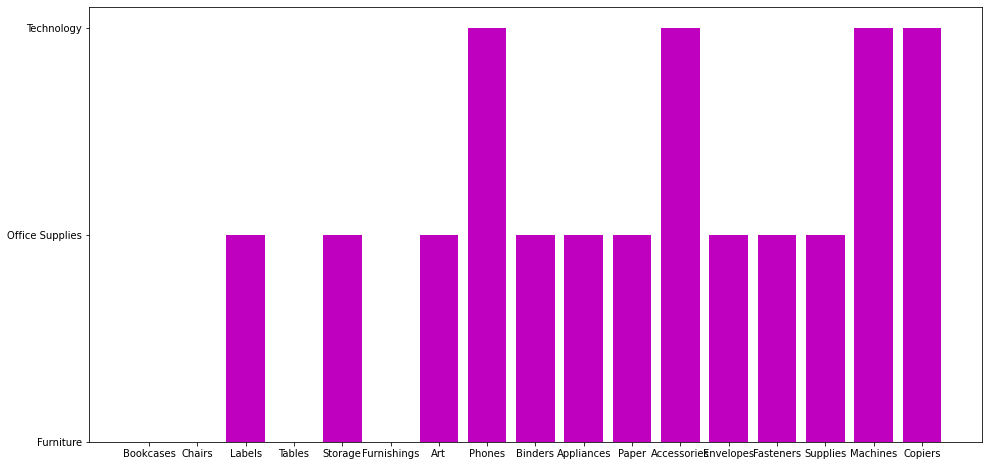

In [ ]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=store_df,color='m')
plt.show()

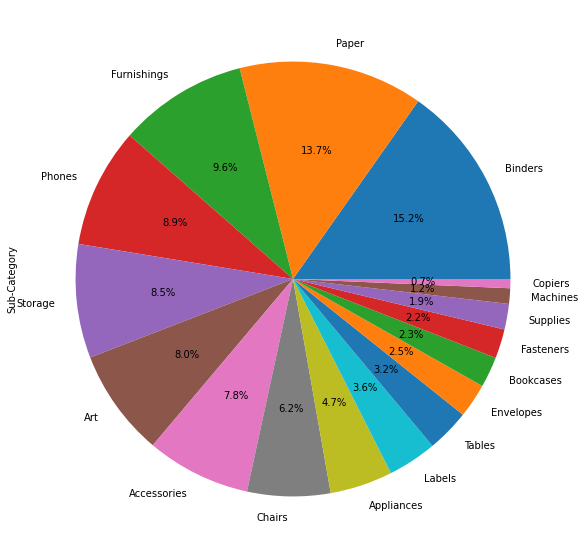

In [ ]:
plt.figure(figsize=(12,10))
store_df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


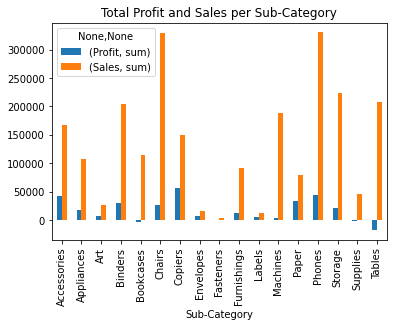

In [ ]:
store_df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

Most profit was earned in copiers and Selling price for Chairs and Phones is extremely high compared to other products.
Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. 
Hence these departments are in loss.

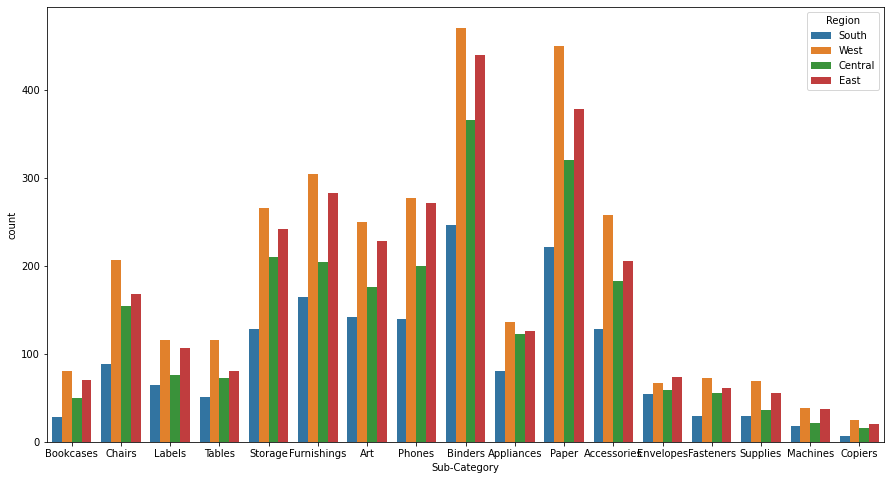

In [ ]:
#Count of Sub-Category region wise
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=store_df)
plt.show()

People residing in Western part of US tend to order more from superstore.

To understand the data better. Lets create some new columns like Actual Cost,Profit%

In [ ]:
store_df['Cost'] = store_df['Sales']-store_df['Profit']
store_df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [ ]:
store_df['Profit %']=(store_df['Profit']/store_df['Cost'])*100

In [ ]:
#Category of products with high Profit Percentage 
store_df.sort_values(['Profit %','Category'],ascending=False).groupby('Profit %').head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
318,Standard Class,Home Office,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900,1995.9900,100.000000
1696,Second Class,Home Office,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
4029,Standard Class,Consumer,Lafayette,Louisiana,70506,South,Technology,Machines,479.970,3,0.0,239.9850,239.9850,100.000000
5068,Standard Class,Home Office,Trenton,Michigan,48183,Central,Technology,Copiers,549.990,1,0.0,274.9950,274.9950,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


Retailers selling Phone,Binders,Papers have got 100% Profit in their Business

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


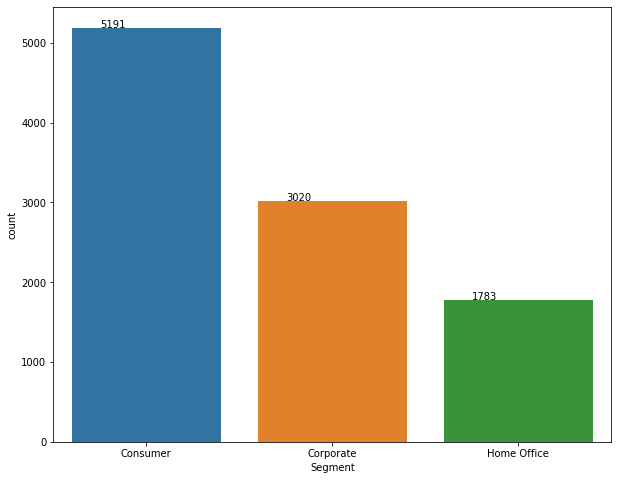

In [ ]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = store_df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

The distribution is highest in Consumer Segment.

In [ ]:
store_df.corr()

,Postal Code,Sales,Quantity,Discount,Profit,Cost,Profit %
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.014247,-0.056863
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064,0.927710,-0.060972
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253,0.199012,0.001901
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487,0.061448,-0.773335
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000,0.116757,0.215752
Cost,-0.014247,0.927710,0.199012,0.061448,0.116757,1.000000,-0.160742
Profit %,-0.056863,-0.060972,0.001901,-0.773335,0.215752,-0.160742,1.000000


In [ ]:
store_df.cov()

,Postal Code,Sales,Quantity,Discount,Profit,Cost,Profit %
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445,-251636.917145,-75143.022655
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586,318490.358722,-1566.180002
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769,243.925154,0.174331
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173,6.987945,-6.580152
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055,15066.298530,2083.062117
Cost,-2.516369e+05,318490.358722,243.925154,6.987945,15066.298530,303424.060192,-3649.242119
Profit %,-7.514302e+04,-1566.180002,0.174331,-6.580152,2083.062117,-3649.242119,1698.627542


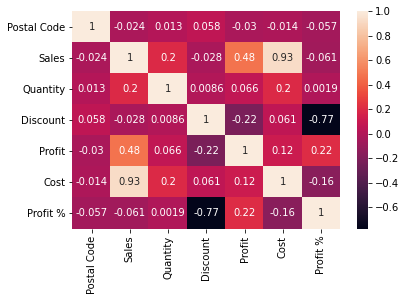

In [ ]:
sns.heatmap(store_df.corr(),annot=True)
plt.show()

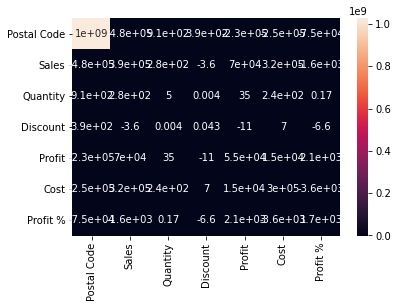

In [ ]:
sns.heatmap(store_df.cov(),annot=True)
plt.show()

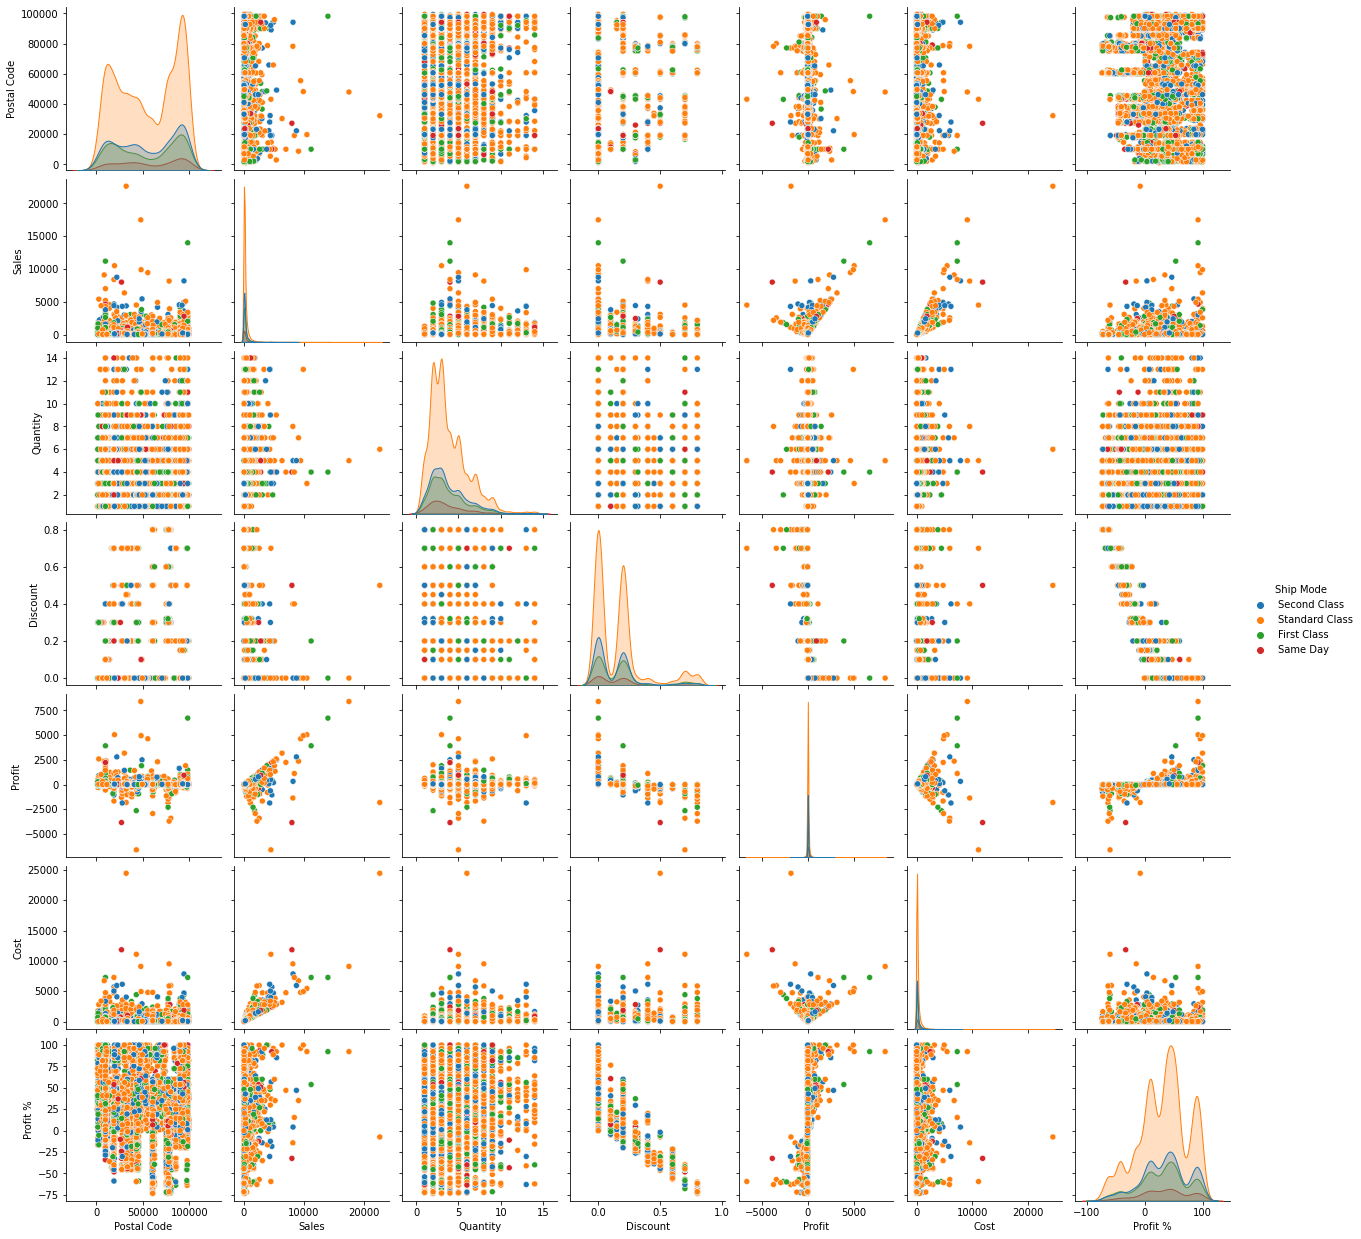

In [ ]:
sns.pairplot(store_df,hue='Ship Mode')

In [ ]:
store_df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

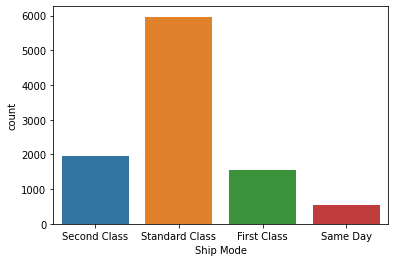

In [ ]:
sns.countplot(x=store_df['Ship Mode'])

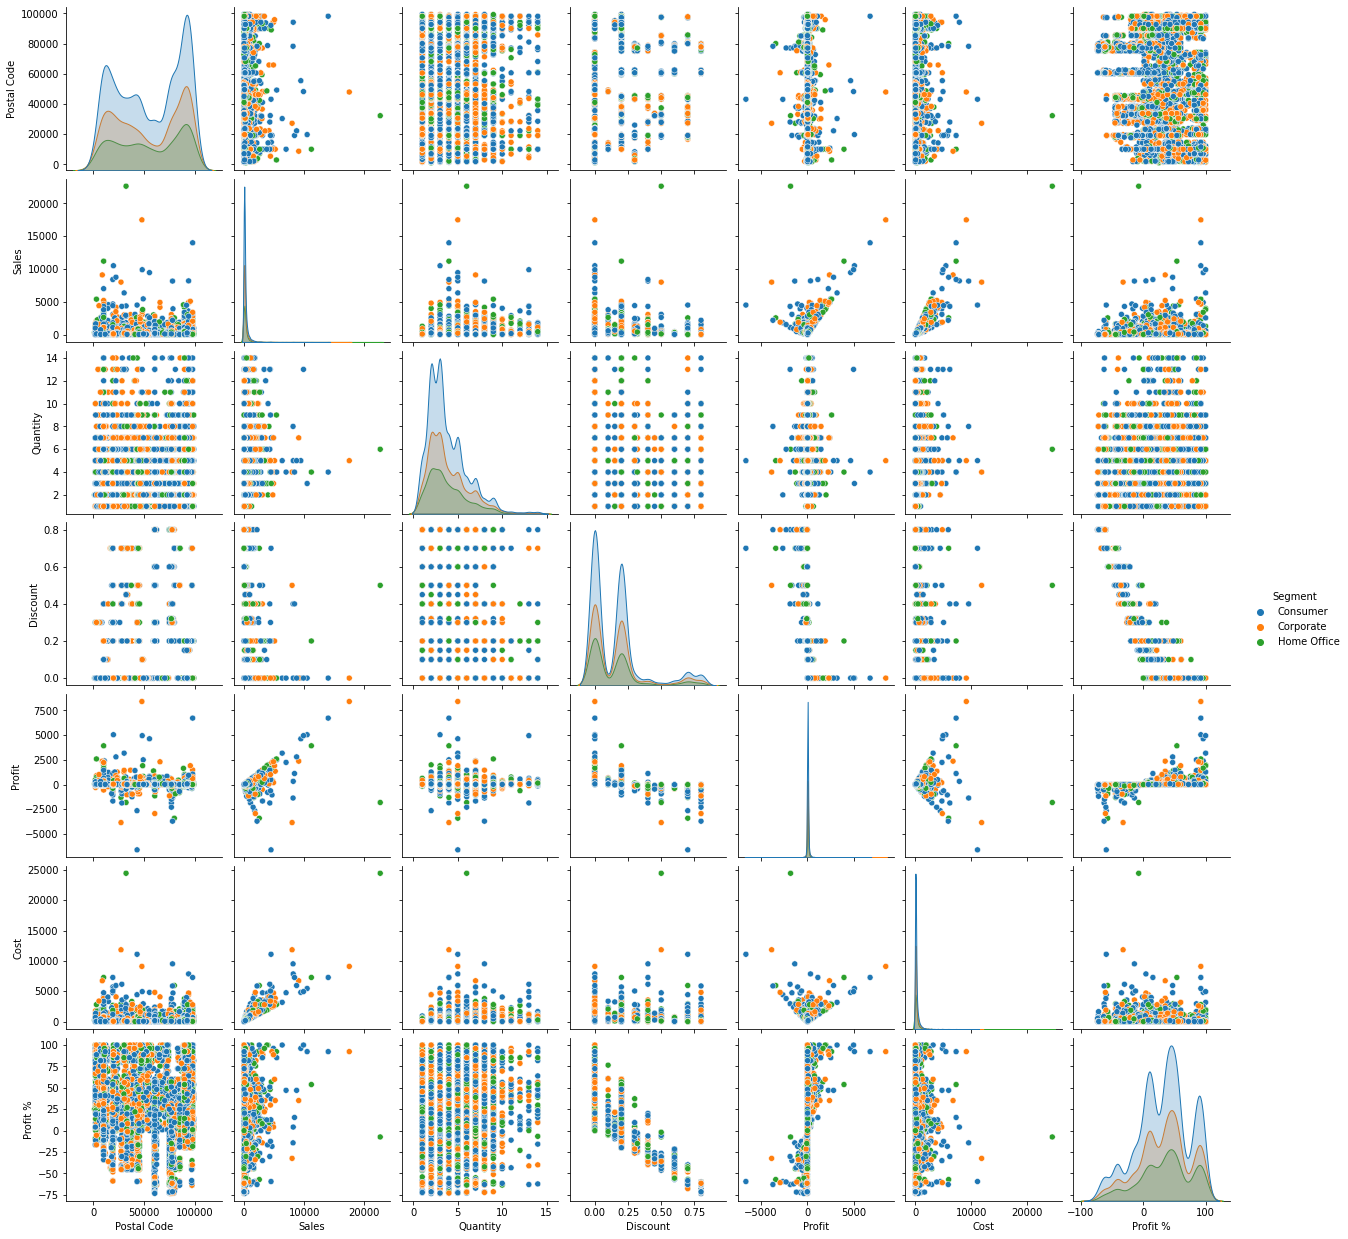

In [ ]:
sns.pairplot(store_df,hue='Segment')

In [ ]:
store_df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

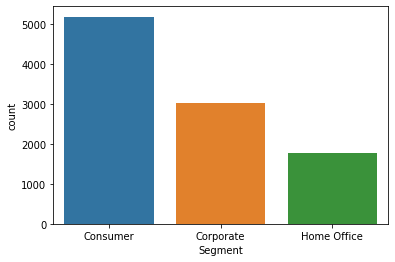

In [ ]:
sns.countplot(x=store_df['Segment'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


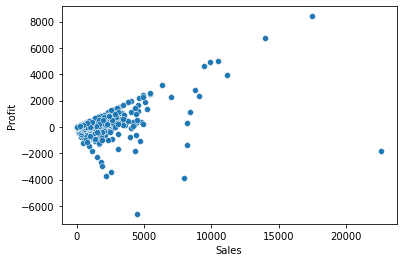

In [ ]:
sns.scatterplot('Sales','Profit',data=store_df)

In Conclusion we can derive that

1.  Tables and Bookcases departments from Superstore are in loss. So it will better to keep the stock low for these items and not invest in it furthermore.
OR
Implement measures to make more profit in these areas.
2. People residing in Western part of US tend to order more from superstore.
3. Retailers selling Phone,Binders,Papers have got 100% Profit in their Business
4. The distribution is highest in Consumer Segment.

